Author: WenJun Cen  
File: Hotel Demand - Kaggle

## Dataset Description

- The data is obtained from Kaggle, and it originated from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020.

- The dataset contains data on the types of hotel and the details of their customers. It documents the length of stay, numer of adults and children, whether they are repeated guests, and various segments of guest and room descriptions.

- (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2.

- For more details on the dateset and the meaning of the features, https://www.sciencedirect.com/science/article/pii/S2352340918315191 documents all necessary information for the dataset obtained.

## Objectives

- The goal of analyzing the dataset is to understand the trend and behaviors of guests. Also, predictive models will be implemented to see if the dataset can accurate classify whether guests will cancel their booking based on the data collected.



In [174]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [175]:
pd.set_option('display.max_columns', 500)

In [176]:
hotel = pd.read_csv('hotel_bookings.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [177]:
hotel.shape

(119390, 32)

In [178]:
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [179]:
# Since company is mostly null which consists of 112593 / 119390, it will be dropped along with agent.
# There are also 488 null records in country and 4 empty record in children that will be dropped
hotel.drop(columns=['agent', 'company'], inplace=True)

In [180]:
hotel.dropna(inplace=True)

In [181]:
hotel['children'] = hotel.children.astype('int')
hotel['reservation_status_date'] =pd.to_datetime(hotel.reservation_status_date)
hotel['arrival_date_month'] = pd.to_datetime(hotel.arrival_date_month, format='%B').dt.month

#### Summary Statistics

In [182]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [183]:
hotel.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,6.552886,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,3.087050,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
90%,1.000000,265.000000,2017.000000,11.000000,46.000000,28.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,164.200000,0.000000,2.000000
99%,1.000000,444.000000,2017.000000,12.000000,53.000000,31.000000,4.000000,10.000000,3.000000,2.000000,0.000000,1.000000,1.000000,3.000000,3.000000,75.000000,252.000000,1.000000,3.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


## Exploratory Data Analysis

#### What is the cancel rate and for all and the two types of hotel?

In [184]:
print(f'The total cancel rate is {hotel.is_canceled.mean() * 100:.2f}%')
hotel.groupby('hotel').is_canceled.mean()

The total cancel rate is 37.14%


hotel
City Hotel      0.417089
Resort Hotel    0.279750
Name: is_canceled, dtype: float64

#### What is average lead time for the two types of hotel?

In [185]:
hotel.groupby('hotel').lead_time.mean()

hotel
City Hotel      109.740183
Resort Hotel     93.438857
Name: lead_time, dtype: float64

#### How long do customers stay for the two types of hotel?

In [186]:
hotel.groupby('hotel')['stays_in_weekend_nights', 'stays_in_week_nights'].mean()

,stays_in_weekend_nights,stays_in_week_nights
hotel,,
City Hotel,0.795339,2.182896
Resort Hotel,1.196383,3.141529


#### What are the proportions of customer for the two types of hotel?

In [187]:
hotel.groupby('hotel').customer_type.value_counts()

hotel         customer_type  
City Hotel    Transient          59382
              Transient-Party    17328
              Contract            2300
              Group                292
Resort Hotel  Transient          29792
              Transient-Party     7750
              Contract            1776
              Group                278
Name: customer_type, dtype: int64

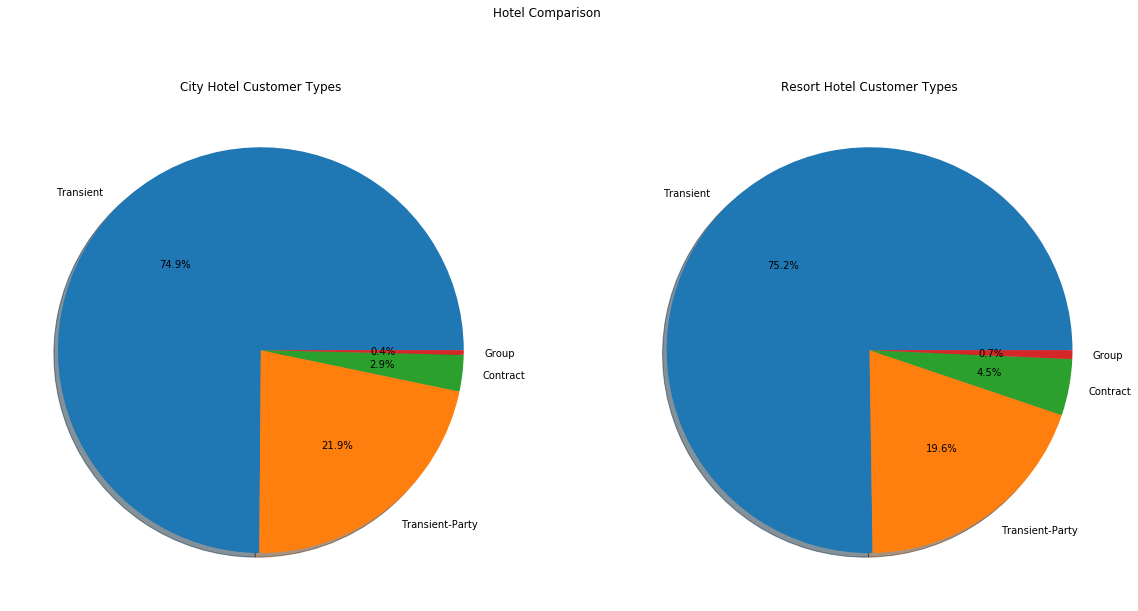

In [188]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
fig.suptitle('Hotel Comparison')

pie1 = hotel.loc[hotel.hotel == 'City Hotel'].customer_type.value_counts()
pie2 = hotel.loc[hotel.hotel == 'Resort Hotel'].customer_type.value_counts()
pie1_label = pie1.index
pie2_label = pie2.index

ax1.pie(pie1, labels=pie1_label, shadow=True, autopct='%1.1f%%')
ax1.set_title('City Hotel Customer Types')

ax2.pie(pie2, labels=pie2_label, shadow=True, autopct='%1.1f%%')
ax2.set_title('Resort Hotel Customer Types')

plt.show()

#### What is the trend of cancelling for each month?

In [189]:
hotel.groupby(['hotel', 'arrival_date_month']).is_canceled.mean()

hotel         arrival_date_month
City Hotel    1                     0.396681
              2                     0.382880
              3                     0.369464
              4                     0.462948
              5                     0.443756
              6                     0.446922
              7                     0.408754
              8                     0.400713
              9                     0.420270
              10                    0.428666
              11                    0.381259
              12                    0.420683
Resort Hotel  1                     0.151543
              2                     0.260584
              3                     0.232246
              4                     0.294480
              5                     0.288695
              6                     0.331685
              7                     0.314978
              8                     0.335727
              9                     0.322791
              10      

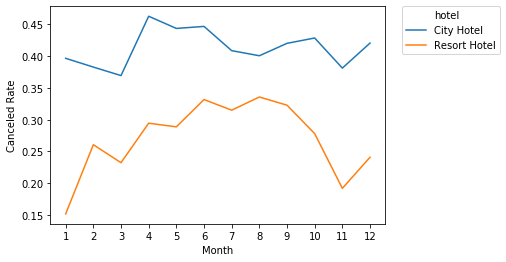

In [190]:
monthly_trend = hotel.groupby(['hotel', 'arrival_date_month']).is_canceled.mean().reset_index()

ax = sns.lineplot(x=monthly_trend.arrival_date_month,
                  y=monthly_trend.is_canceled,
                  hue=monthly_trend.hotel)

ax.set(xlabel='Month', ylabel='Canceled Rate')
ax.set(xticks=np.arange(1,13))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Which top 3 countries have the most reservation cancellation?

In [191]:
top3Cancel = hotel.loc[hotel.is_canceled ==1]
top3Cancel = top3Cancel.groupby(['hotel','country'])['is_canceled'].apply(lambda x: x.value_counts()).reset_index()

#Find the index of the top 3 largest value counts
top3index = [element[1] for element in top3Cancel.groupby(['hotel'])['is_canceled'].nlargest(3).index]

#Drop column to identify is_cancel = 1
top3Cancel = top3Cancel.iloc[top3index].drop(columns='level_2')
top3Cancel.rename(columns={'is_canceled':'cancel_counts'}, inplace=True)
top3Cancel

,hotel,country,cancel_counts
96,City Hotel,PRT,20077
37,City Hotel,FRA,1723
40,City Hotel,GBR,1562
182,Resort Hotel,PRT,7438
152,Resort Hotel,GBR,891
147,Resort Hotel,ESP,851


## Classification Prediction

In [192]:
# Import libraries
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

### Correlation Matrix

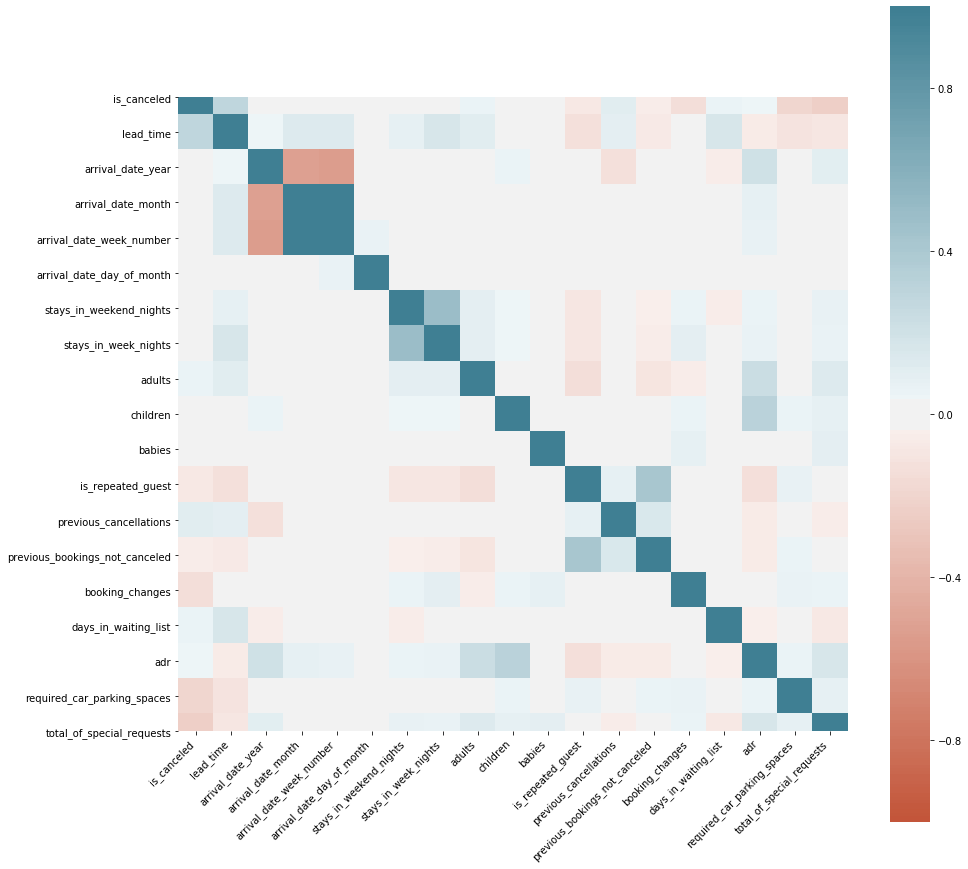

In [193]:
plt.figure(figsize=(15,15))
corr = hotel.corr()
ax = sns.heatmap(corr,
                vmin=-1, vmax=1, center=0,
                cmap=sns.diverging_palette(20, 220, n=200),
                square=True
               )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

### Features Selection

In [194]:
hotelY = hotel['is_canceled']

In [195]:
# Drop columns to help model implementation
hotelX = hotel.drop(columns=['is_canceled', 'arrival_date_year', 'arrival_date_week_number', 'reservation_status_date', 'country'])

##### Split Categorical and Numerical columns to do preprocessing

In [196]:
numerical_columns = [c for c, dtype in zip(hotelX.columns, hotelX.dtypes) if dtype.kind in ['i', 'f']]
categorical_columns = [c for c, dtype in zip(hotelX.columns, hotelX.dtypes) if dtype.kind not in ['i', 'f']]

In [197]:
print('Numerical Columns:' + str(numerical_columns))
print()
print('Categorical Columns:' + str(categorical_columns))

Numerical Columns:['lead_time', 'arrival_date_month', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

Categorical Columns:['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


#### Train_Test_Split

In [198]:
trainX, testX, trainY, testY = train_test_split(hotelX, hotelY, test_size=0.2, random_state=0)

#### LASSO for feature extraction

In [199]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(hotelX[numerical_columns], hotelY).coef_

# Features selected through Lasso
lasso_nonzero = np.nonzero(lasso_coef)
lasso_nonzero = lasso_nonzero[0]
[numerical_columns[i] for i in lasso_nonzero]

['lead_time', 'adr']

### Applying preprocessing methods in make_columns_tranformer

In [200]:
preprocessed = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    (StandardScaler(), numerical_columns)
)

### Building Pipelines

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [202]:
LogisticModel = make_pipeline(preprocessed, LogisticRegression(solver='lbfgs',random_state=0))

In [203]:
RandomForest = make_pipeline(preprocessed, RandomForestClassifier(n_estimators=100))

In [204]:
SGD = make_pipeline(preprocessed, SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=5))

In [205]:
knn = make_pipeline(preprocessed, KNeighborsClassifier(n_neighbors=3))

### Evaluation

In [206]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

#### Logistic Model

In [207]:
LogisticModel.fit(trainX, trainY)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                                                  ['hotel', 'meal',
                                  

#### Random Forest

In [209]:
RandomForest.fit(trainX, trainY)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                                                  ['hotel', 'meal',
                                  

In [ ]:
accuracy_score(testY,RandomForest.predict(testX))